# Assignment 2 DD2358
 Group 17: Felix Schätzle, Georgios Mitsos, Thorben Fetz

## Exerice 1: STREAM Benchmark

## Task 1.1: 

In [2]:
from timeit import default_timer as timer
import numpy as np
import array
import matplotlib.pyplot as plt
from functools import wraps


In [26]:
STREAM_ARRAY_SIZE = 30_000_000

# LISTS
a = [1.0]*STREAM_ARRAY_SIZE
b = [2.0]*STREAM_ARRAY_SIZE
c = [0.0]*STREAM_ARRAY_SIZE

# ARRAYS
a_2 = array.array('f',[1.0]*STREAM_ARRAY_SIZE)
b_2 = array.array('f',[2.0]*STREAM_ARRAY_SIZE)
c_2 = array.array('f',[0.0]*STREAM_ARRAY_SIZE)

scalar = 2.0


In [27]:
times = [0.0]*8

# LISTS
# copy
times[0] = timer()
for j in range(STREAM_ARRAY_SIZE):
    c[j] = a[j]
times[0] = timer() - times[0]

# scale
times[1] = timer()
for j in range(STREAM_ARRAY_SIZE):
    b[j] = scalar*c[j]
times[1] = timer() - times[1]
     
#sum
times[2] = timer()
for j in range(STREAM_ARRAY_SIZE):
    c[j] = a[j]+b[j]
times[2] = timer() - times[2]

# triad
times[3] = timer()
for j in range(STREAM_ARRAY_SIZE):
    a[j] = b[j]+scalar*c[j]
times[3] = timer() - times[3]

# ARRAYS
# copy
times[4] = timer()
for j in range(STREAM_ARRAY_SIZE):
    c_2[j] = a_2[j]
times[4] = timer() - times[4]

# scale
times[5] = timer()
for j in range(STREAM_ARRAY_SIZE):
    b_2[j] = scalar*c_2[j]
times[5] = timer() - times[5]
     
#sum
times[6] = timer()
for j in range(STREAM_ARRAY_SIZE):
    c_2[j] = a_2[j]+b_2[j]
times[6] = timer() - times[6]

# triad
times[7] = timer()
for j in range(STREAM_ARRAY_SIZE):
    a_2[j] = b_2[j]+scalar*c_2[j]
times[7] = timer() - times[7]


In [28]:
# elements of the lists are double precision floats so they occupy 8 bytes
nob = 8 # number of bytes

data_kernel = [0.0]*8

# LISTS
data_kernel[0] = 2 * nob * STREAM_ARRAY_SIZE / 1e6
data_kernel[1] = 2 * nob * STREAM_ARRAY_SIZE / 1e6
data_kernel[2] = 3 * nob * STREAM_ARRAY_SIZE / 1e6
data_kernel[3] = 3 * nob * STREAM_ARRAY_SIZE / 1e6

# ARRAYS
data_kernel[4] = 2 * nob * STREAM_ARRAY_SIZE / 1e6
data_kernel[5] = 2 * nob * STREAM_ARRAY_SIZE / 1e6
data_kernel[6] = 3 * nob * STREAM_ARRAY_SIZE / 1e6
data_kernel[7] = 3 * nob * STREAM_ARRAY_SIZE / 1e6


Choosing large values for STREAM_ARRAY_SIZE minimizes the effect of memory latency and other sources of computational overhead, as well as the effect of cache memory. In this way, the calculation of bandwidth becomes more accurate.

Note: With STREAM_ARRAY_SIZE = 30_000_000 and double-precision floats, each Python array is 240 MB. This is much larger than the cache memory of the laptop (2022 MacBook Air M2 16 GB RAM).


In [29]:
bw = [0.0]*8 # memory bandwidth, [bytes/sec]

for i in range(8):
    bw[i] = data_kernel[i]/times[i]
    

The memory bandwidth for each kernel is presented in the table below. The units are MB/sec.

| Type | Copy BW | Scale BW | Sum BW | Triad BW |
| --- | --- | --- | --- | --- | 
| List | 498.3 | 382.2 | 508.4 | 434.2 |
| Array | 297.0 | 263.5 | 326.9 | 298.7 |


## Task 1.2: 

In [137]:
STREAM_ARRAY_SIZE_VECTOR = [10, 100, 1000, 5000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000]
# STREAM_ARRAY_SIZE_VECTOR = [10, 100, 1000, 10_000]

scalar = 2.0

nob = 8 # number of bytes

times = [[0] * len(STREAM_ARRAY_SIZE_VECTOR) for _ in range(8)]
data_kernel = [[0] * len(STREAM_ARRAY_SIZE_VECTOR) for _ in range(8)]
bw = [[0] * len(STREAM_ARRAY_SIZE_VECTOR) for _ in range(8)]


In [138]:
for i in range(len(STREAM_ARRAY_SIZE_VECTOR)):
    # LISTS
    a = [1.0]*STREAM_ARRAY_SIZE_VECTOR[i]
    b = [2.0]*STREAM_ARRAY_SIZE_VECTOR[i]
    c = [0.0]*STREAM_ARRAY_SIZE_VECTOR[i]

    # ARRAYS
    a_2 = array.array('f',[1.0]*STREAM_ARRAY_SIZE_VECTOR[i])
    b_2 = array.array('f',[2.0]*STREAM_ARRAY_SIZE_VECTOR[i])
    c_2 = array.array('f',[0.0]*STREAM_ARRAY_SIZE_VECTOR[i])
    
    # LISTS
    # copy
    times[0][i] = timer()
    for j in range(STREAM_ARRAY_SIZE_VECTOR[i]):
        c[j] = a[j]
    times[0][i] = timer() - times[0][i]

    # scale
    times[1][i] = timer()
    for j in range(STREAM_ARRAY_SIZE_VECTOR[i]):
        b[j] = scalar*c[j]
    times[1][i] = timer() - times[1][i]

    #sum
    times[2][i] = timer()
    for j in range(STREAM_ARRAY_SIZE_VECTOR[i]):
        c[j] = a[j]+b[j]
    times[2][i] = timer() - times[2][i]

    # triad
    times[3][i] = timer()
    for j in range(STREAM_ARRAY_SIZE_VECTOR[i]):
        a[j] = b[j]+scalar*c[j]
    times[3][i] = timer() - times[3][i]

    # ARRAYS
    # copy
    times[4][i] = timer()
    for j in range(STREAM_ARRAY_SIZE_VECTOR[i]):
        c_2[j] = a_2[j]
    times[4][i] = timer() - times[4][i]

    # scale
    times[5][i] = timer()
    for j in range(STREAM_ARRAY_SIZE_VECTOR[i]):
        b_2[j] = scalar*c_2[j]
    times[5][i] = timer() - times[5][i]

    #sum
    times[6][i] = timer()
    for j in range(STREAM_ARRAY_SIZE_VECTOR[i]):
        c_2[j] = a_2[j]+b_2[j]
    times[6][i] = timer() - times[6][i]

    # triad
    times[7][i] = timer()
    for j in range(STREAM_ARRAY_SIZE_VECTOR[i]):
        a_2[j] = b_2[j]+scalar*c_2[j]
    times[7][i] = timer() - times[7][i]
    
    # LISTS
    data_kernel[0][i] = 2 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[1][i] = 2 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[2][i] = 3 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[3][i] = 3 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6

    # ARRAYS
    data_kernel[4][i] = 2 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[5][i] = 2 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[6][i] = 3 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[7][i] = 3 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    
    for j in range(8):
        bw[j][i] = data_kernel[j][i]/times[j][i]
    

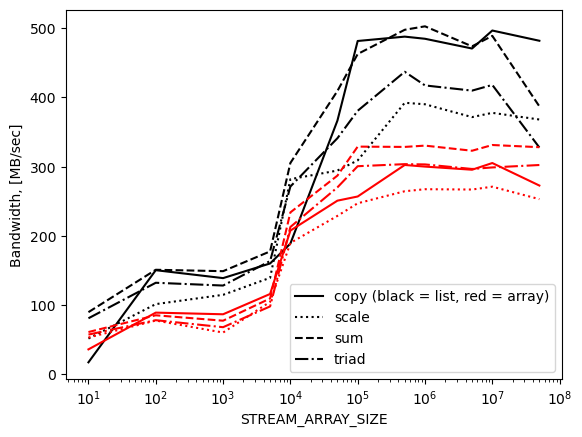

In [141]:
# plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[j], label=f'CPU {i}')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[0], linestyle='solid', linewidth=1.5, color='black', label=f'copy (black = list, red = array)')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[1], linestyle='dotted', linewidth=1.5, color='black', label=f'scale')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[2], linestyle='dashed', linewidth=1.5, color='black', label=f'sum')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[3], linestyle='dashdot', linewidth=1.5, color='black', label=f'triad')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[4], linestyle='solid', linewidth=1.5, color='red')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[5], linestyle='dotted', linewidth=1.5, color='red')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[6], linestyle='dashed', linewidth=1.5, color='red')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[7], linestyle='dashdot', linewidth=1.5, color='red')
plt.xscale("log")
plt.xlabel('STREAM_ARRAY_SIZE')
plt.ylabel('Bandwidth, [MB/sec]')
plt.legend()
plt.show()


The bandwidth varies significantly with the size and type of Python arrays. 

The bandwidth increases with array size up to 10000 elements and then remains constant (or reduces) up to 50_000_000 elements. As discussed in the previous task, larger arrays lead to more effective memory usage since the effect of overheads are reduced.

Moreover, the bandwidth is larger for kernels involving lists, rather than arrays. The difference is due to the data storing of the two types of Python arrays. Lists store elements as individual objects in memory, while arrays store them as large chuncks.


## Exerice 2: PyTest

## Task 2.1:

The pytest framework is used for the testing of the output of calc_pure_python. 

The function test_output was added at the end of test_JuliaSet.py. The function is presented in the next cell. 


In [30]:
def test_output():
    assert sum(calc_pure_python(1000,300)) == 33219980

In [31]:
%run -m pytest test_JuliaSet.py


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0
rootdir: /Users/georgiosmitsos/HPC_KTH/assignment2
plugins: anyio-3.5.0
collected 1 item

test_JuliaSet.py .                                                       [100%]

============================== 1 passed in 1.99s ===============================


## Task 2.2:

For the present Task, test_output needs to be changed to:

In [13]:
@pytest.mark.parametrize('desired_width, max_iterations, expected_output', [(1000,300,33219980),
                                                                            (1500,500,120023366),
                                                                            (2000,400,173085144)]) 

def test_output(desired_width, max_iterations, expected_output):
    assert sum(calc_pure_python(desired_width, max_iterations)) == expected_output
    

In this way, 3 combinations of desired_width and max_iterations are checked.


In [14]:
%run -m pytest test_JuliaSet_2.py


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0
rootdir: /Users/georgiosmitsos/HPC_KTH/assignment2
plugins: anyio-3.5.0
collected 3 items

test_JuliaSet_2.py ...                                                   [100%]

============================== 3 passed in 19.26s ==============================


## Exerice 3: DGEMM Benchmark


BLAS is used for vector, matrix-vector and matrix-matrix operations.


BLAS Level-1: vector-vector operations

BLAS Level-2: matrix-vector operations

BLAS Level-3: matrix-matrix operations


## Task 3.1:

Implementation of DGEMM for NumPy arrays:


In [2]:
def dgemm_numpy(N):

    np.random.seed(40)
    A = np.random.random((N,N))
    print(A)
    
    np.random.seed(41)
    B = np.random.random((N,N))
    
    np.random.seed(42)
    C = np.random.random((N,N))
        
    for i in range(N):
        for j in range(N):
            for k in range(N):
                C[i,j] = C[i,j] + A[i,k] * B[k,j]
                
    return C 
            

## Task 3.2:

The results of our DGEMM code are compared to C_test = C + np.matmul(A,B). It is tested if np.max(abs(C-C_test)) is smaller than 1e-12 for matrices A, B, C of dimension 200x200.


In [1]:
%run -m pytest test_my_dgemm.py


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0
rootdir: /Users/georgiosmitsos/HPC_KTH/assignment2
plugins: anyio-3.5.0
collected 1 item

test_my_dgemm.py .                                                       [100%]

============================== 1 passed in 2.12s ===============================


## Task 3.3:

The following code (dgemm_alternatives.py) is used to create random matrices (Python lists or NumPy arrays) of different dimensions and measure the execution time of DGEMM as a function of these parameters. 


In [6]:
global t_diff, t_tot
t_diff = []
t_tot = []

def timefn(fn): # time decorator
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 =  timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        t_diff.append(t2-t1)
        return result
    return measure_time


def dgemm_alt(N):
    np.random.seed(40)
    A = np.random.rand(N,N)
    A_list = A.tolist()
    
    np.random.seed(41)
    B = np.random.rand(N,N)
    B_list = B.tolist()
    
    np.random.seed(42)
    C = np.random.rand(N,N)
    C_list = C.tolist()
    
    C = dgemm_numpy(N,A,B,C)
    C_list = dgemm_list(N,A_list,B_list,C_list)
    
    return C, C_list


@timefn
def dgemm_numpy(N,A,B,C):
    for i in range(N):
        for j in range(N):
            for k in range(N):
                C[i,j] = C[i,j] + A[i,k] * B[k,j]            
    return C 
    
    
@timefn
def dgemm_list(N,A_list,B_list,C_list):
    for i in range(N):
        for j in range(N):
            for k in range(N):
                C_list[i][j] = C_list[i][j] + A_list[i][k] * B_list[k][j]            
    return C_list

if __name__ == "__main__":
    n = 5 # run n times to calculate average and standard deviation
    for i in [10,50,80,120,160,200]:
        for ii in range(n):
            dgemm_alt(i)
        # t_tot has 6 nested lists, each one with 4 elements: avg time and std for NumPy DGEMM, avg time and std for List DGEMM 
        t_tot.append([np.mean(t_diff[0::2]),np.std(t_diff[0::2]),np.mean(t_diff[1::2]),np.std(t_diff[1::2])])
        t_diff = [] # reset for different matrix sizes 


The execution time for DGEMM as a function of matrix dimensions and Python array is presented below (as average time $$). The units are sec.

It can be seen that the operations are about 6 times faster using list than using NumPy arrays. 

The computational times are longer for larger matrices (of dimension NxN) and seem to be proportional to N^a, where a is a number between 2 and 3. 

| Number of elements | Execution time (NumPy arrays) | Execution time (Lists) |
| --- | --- | --- |
| 10 | 3.9e-4 $\pm$ 6.4e-6 | 7e-5 $\pm$ 1.3e-6 | 
| 50 | 3.2e-2 $\pm$ 2.9e-3 | 5e-3 $\pm$ 1.8e-4 |
| 80 | 0.13 $\pm$ 1.2e-3 | 2e-2 $\pm$ 1.1e-4 |
| 120 | 0.42 $\pm$ 4.4e-3 | 6.9e-2 $\pm$ 3.4e-4 |
| 160 | 1.01 $\pm$ 1.2e-2 | 0.16 $\pm$ 7.7e-4 |
| 200 | 2.12 $\pm$ 8.8e-2 | 0.36 $\pm$ 3.4e-2 |

Python arrays are not used for the present Task since they are not suitable for multi-dimensional arrays.


## Task 3.4:

DGEMM has been implemented as 3 nested for-loops of dimension N, therefore a different value is assigned to an element of matrix C N^3 times. There are also 2 FLOPS per iteration, a multiplication and an addition. Therefore, 2*N^3 FLOPS are carried out in DGEMM. FLOPS/sec are calculated by dividing this value with the execution time. 

| Number of elements | FLOPS | FLOPS/sec (NumPy arrays) | FLOPS/sec (Lists) |
| --- | --- | --- | --- |
| 10 | 2000 | 5.1e6 | 28.6e6 | 
| 50 | 250_000 | 7.8e6 | 50e6 |
| 80 | 1_024_000 | 7.9e6 | 51.2e6 |
| 120 | 3_456_000 | 8.2e6 | 50.1e6 |
| 160 | 8_192_000 | 8.1e6 | 51.2e6 |
| 200 | 16_000_000 | 7.5e6 | 44.4e6 |

The clock frequency of the laptop is 3.49 GHz, so the theoretical peak value is 3.49e9 FLOPS/sec. So, only 0.2% of the theoretical maximum is achieved with NumPy arrays and 1.4% with lists. This can be due to: 1) memory access bottlenecks, 2) algorithm compatibility with hardware and 3) performance restrictions imposed by the laptop (e.g. overheating).


## Task 3.5:

matmul is used alternatively for DGEMM and is timed.


In [26]:
global t_diff
t_diff = []

def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 =  timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        t_diff.append(t2-t1)
        return result
    return measure_time

def dgemm_alt(N):
    np.random.seed(40)
    A = np.random.rand(N,N)
    
    np.random.seed(41)
    B = np.random.rand(N,N)
    
    np.random.seed(42)
    C = np.random.rand(N,N)
    
    C = dgemm_matmul(N,A,B,C)
    
    return C

@timefn
def dgemm_matmul(N,A,B,C):
    C = C + np.matmul(A,B)            
    return C 
    

if __name__ == "__main__":
    for i in [10,50,80,120,160,200]:
        dgemm_alt(i)
    print(f'The execution times for matrix dimensions {[10,50,80,120,160,200]} are {t_diff}')
        

The execution times for matrix dimensions [10, 50, 80, 120, 160, 200] are [3.616604954004288e-05, 0.00015733297914266586, 0.014533875044435263, 0.004591292003169656, 0.012969332979992032, 0.012681582942605019]


Comparing the results of matmul, it is obvious that the calculations are more than one order of magnitude faster than the previous ones. This is due to the fact that matmul uses the BLAS library, which includes optimized routines for operations including matrices and vectors.


## Exercise 4: Python Debugger

### Task 4.1 Reflection
A debugger is useful to inspect a program for testing purposes without having to rely on ``print()`` functions. It allows the developer to view relevant sections of source code, pause and resume execution at will, and inspect variable values. 

Python has some advantages for debugging, for instance it's possible to add breakpoints at runtime due to the line-by-line execution by JIT. However, the high level of abstraction of the language makes it more difficult to understand the underlying machine code, which is much more accessible in a language like C. ``pdb`` makes an effort to offer similar functionality as ``gdb``, while adapting to the limitations and opportunities offered by Python. 

## Bonus Exercise: Optimizing Conway's Game of Life
### Task B.1 Linting and documentation
The code in [conway.py](conway.py) is already properly formatted, so neither ``black`` nor ``pylint`` find any issues. However, the comments could be more expressive and standardized docstrings. 

### Task B.2 Execution time
Shown below is the execution time of the ``update`` function, for different grid sizes and 10 iterations each. 
![Conway standard](conway_standard.png)

## Bonus

### B3


#### Profiling the performance of the script using: perf stat -e cycles,instructions,cache-references,cache-misses,branches,branch-misses,task-clock,faults,minor-faults,cs,migrations python conway.py

#### Line profiling usning: python -m kernprof -l conway.py
